# IBM Data Science | Data Analysis with Python - Pre-processing Data

Created by: Sangwook Cheon   

Date: June 26, 2019

In this notebook, we will learn about Processing Data in Python. Preprocessing data after getting the data is very important before diving into building machine learning models. Preprocessing is the process of converting or mapping data from initial form into another format, in order to prepare it for further data analysis.

This notebook does not cover everything about preprocessing. There are other learning resources to learn further.

**Learning Objectives**:
* Identify and handle missing values
* Data Formatting
* Data Normalization (centering /scaling)
* Data Binning
* Turning Categorical Values to numeric variables

This notebook integrates with a Hands-On Lab provided, and alongside I added more notes and explanations. 

----

## Handling Missing Values
Missing values could be represented as "?", "N/A", 0, Blank Cell, etc.
Here are some ways to go about dealing with missing values:

**Drop the Missing Values**
* Drop the entire variable, or drop the data entry (minimizes data loss)  

**Replace the Missing Values**
* Replace it with an average of similar datapoints
* Replace it by frequency (most common)
* Replace it based on other functions 

In some cases, leave it as missing data, if deemed important to do so.

### Import Data
Let's first import data to work with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#filename of the data
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

#list containing headers of the data
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method **read_csv()** to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".  
Then, Use the method **head()** to display the first five rows of the dataframe.

In [3]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As can be identified in the table, there are many question marks indicating that they are missing values that need to be removed. How can we deal with these values in Python?

## Identify and handle missing values
### Identify missing values
#### Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is **Python's default missing value marker**, for reasons of computational speed and convenience. Here we use the function:   

 ```python 
.replace(A, B, inplace = True)
```  
 
to replace A by B

In [4]:
import numpy as np

df.replace("?", np.nan, inplace = True)
#inplace = True allows modification of the existing dataframe, not regenerating a new one.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating for Missing Data

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
1. `.isnull()`
2. `.notnull()`

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. "True" stands for missing value.

In [5]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:    
* "normalized-losses": 41 missing data
* "num-of-doors": 2 missing data
* "bore": 4 missing data
* "stroke" : 4 missing data
* "horsepower": 2 missing data
* "peak-rpm": 2 missing data
* "price": 4 missing data

### Deal with missing data
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean**:
* "normalized-losses": 41 missing data
* "stroke" : 4 missing data
* "bore": 4 missing data
* "horsepower": 2 missing data
* "peak-rpm": 2 missing data

**Replace by frequency**:
* "num-of-doors": 2 missing data
    * Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

**Drop the whole row**:
* "price": 4 missing data, simply delete the whole row
    * Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

Below are steps to deal with 'normalized-losses' and 'bore' columns:

#### Calculate the average of the columns

In [7]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


#### Replace "NaN" by mean value in "normalized-losses" column

In [8]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Calculate the mean value for 'bore' column, and then replace NaN

In [9]:
avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810957


Let's handle the remaining columns:

In [10]:
#This is a method quickly made by me: Let's create iterations to handle columns that need average to replace NaN values
avg_list = ['stroke', 'horsepower', 'peak-rpm']
for item in avg_list:
    average = df[item].astype('float').mean(axis=0)
    print("Average of {} ".format(str(item)) + str(average))
    df[item].replace(np.nan, average, inplace=True)


Average of stroke 3.2554228855721337
Average of horsepower 104.25615763546799
Average of peak-rpm 5125.369458128079


In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas, we use

`.dtype()` to check the data type

`.astype()` to change the data type

#### Lets list the data types for each column

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [13]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Doing this solved the problem.

---
## Data Standardization
Data is usually collected from different agencies with different formats. (Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)

##### What is Standardization?

Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.

**Example**

Transform mpg to L/100km:

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard.

We will need to apply data transformation to transform mpg into L/100km?

The formula for unit conversion is

L/100km = 235 / mpg

We can do many mathematical operations directly in Pandas.

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [15]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [16]:
# similarly transform mpg to L/100km in the column of "highway-mpg"".
df['highway-L/100km']=235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization
**Why normalization?**

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1.

By making sure that range is consistent among variables, every variable is compared fairly during statistical analysis. For example, if one variable has values that are considerably larger than the others, then statistical analysis might lead to a wrong conclusion that the variable with biggest number is the most significant one. So, Data Normalization prevents this from happening.

**Example**

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"

**Target**: would like to Normalize those variables so their value ranges from 0 to 1.

**Approach**: replace original value by (original value)/(maximum value)

There are several approaches for normalizing data:  
- **Simple Feature Scaling**
$$\Large X_{\textrm{new}}=\frac{X_{\textrm{old}}}{X_{\textrm{max}}}$$  
Here, the range is between 0 and 1

- **Min-Max**
$$\Large X_{\textrm{new}}=\frac{X_{\textrm{old}}-X_{\textrm{min}}}{X_{\textrm{max}}-X_{\textrm{min}}}$$
Here, the range is between 0 and 1

- **Z-score**
$$\Large X_{\textrm{new}}=\frac{X_{\textrm{old}}-\mu}{\sigma}$$  

$\mu$ is average, and $\sigma$ is standard deviation. The range is usually between -3 and 3, values hover around zero.

In [17]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["length", "width", 'height']].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


## Binning

**Why binning?**
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

**Example:**

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

### Example of Binning Data In Pandas
Convert data to correct format

In [18]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

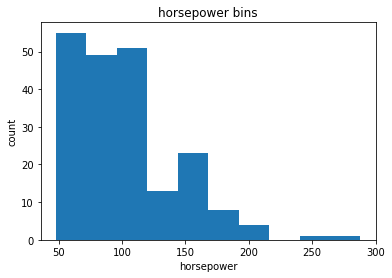

In [19]:
%matplotlib inline
#this ensures that plot gets shown right in this notebook, not as a separate window, for example.
import matplotlib.pyplot as plt
plt.hist(df['horsepower'])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

We would like 3 bins of equal size bandwidth so we use numpy's `linspace(start_value, end_value, numbers_generated` function.

Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).

Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [20]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [21]:
group_names = ['Low', 'Medium', 'High']

With the group names above, We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

In [22]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [23]:
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

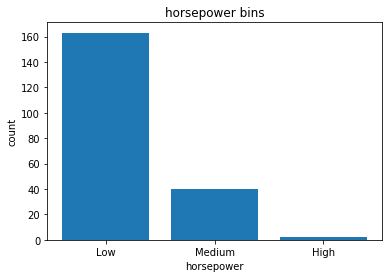

In [24]:
#plotting the distribution of each bin
%matplotlib inline

plt.bar(group_names, df['horsepower-binned'].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

### Bins visualization
Normally, a histogram is used to visualize the distribution of bins we created above.

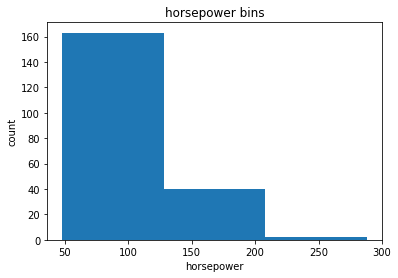

In [25]:
# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

## Indicator variable (or dummy variable)
**What is an indicator variable?**  
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

**Why we use indicator variables?**

So we can use categorical variables for regression analysis in the later modules.

**Example**
We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [27]:
#get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

#change column names for clarity
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset.

In [28]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [29]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [30]:
#Dummy variables for other columns

dum_var2 = pd.get_dummies(df['aspiration'])
dum_var2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dum_var2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [31]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [32]:
#save the new csv
df.to_csv('cleaned_df.csv')

### Information about the Lab
As I mentioned, I incorporated the lab into this notebook to add some more explanations and further analysis.

About the Authors:
This notebook was written by Mahdi Noorian PhD, Joseph Santarcangelo, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and Fiorella Wenver and Yi Yao.

Joseph Santarcangelo is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

---
Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/)

---

